In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_regression

(500, 1)
(500,)


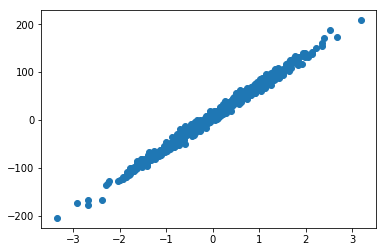

In [2]:
(X, y) = make_regression(n_samples=500, noise=6.5, bias=7.5, n_features=1)
print X.shape
print y.shape

plt.scatter(X, y)
plt.show()

In [34]:
split = int(0.8*X.shape[0])
X_train = X[:split]
X_test = X[split:]

Y_train = y[:split]
Y_test = y[split:]
print X_train.shape
X_train[0]

(400, 1)


array([1.24441314])

In [43]:
'''Functions Needed'''
def hypothesis(x, w):
    '''Gives us y_predicted'''
    x0 = 1
    h = w[0]*x0 + w[1]*x[0]
    return h

def get_error(x, w, y_true):
    error = 0.0
    m = x.shape[0]
    for ix in range(m):
        error += (hypothesis(x[ix], w) - y_true[ix])**2
    error = error/(2*m)
    return error

In [44]:
def get_grads(x, w, y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    m = x.shape[0]
    for ix in range(m):
        grad_0 += (hypothesis(x[ix], w)- y_true[ix])*(-1)
        grad_1 += (hypothesis(x[ix], w) - y_true[ix])*(-1*x[ix][0])
    
    return [grad_0, grad_1]

In [45]:
def gradient_descent(x, w, y_true, learning_rate=0.01):
    '''Batch Gradient Descent'''
    error = get_error(x, w, y_true)
    
    [grad_0, grad_1] = get_grads(x, w, y_true)
    
    w[0] = w[0] + learning_rate*grad_0
    w[1] = w[1] + learning_rate*grad_1
    
    return w, error

In [48]:
num_epochs = 400
lr = 0.0001
error_logs = []
W = np.array([0.1, 0.1])
for ix in range(num_epochs):
    W, error = gradient_descent(X_train, W, Y_train, learning_rate=lr)
    error_logs.append(error)
print error_logs[-1]

22.40398925686155


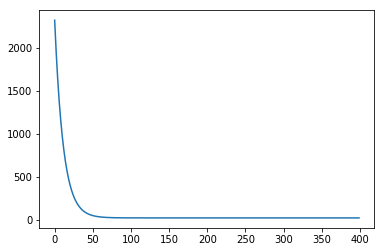

In [49]:
plt.plot(error_logs)
plt.show()

In [50]:
print W

[ 7.40342049 64.72791447]


In [52]:
def get_test_loss(X_test, Y_test):
    '''Homework Assignment'''
    pass